# Модуль A3. Строковые величины. 

## Введение

### Чем мы будем заниматься в этом модуле?

Уважаемый студент, мы рады приветствовать вас в третьем модуле — модуле, посвящённом разным методам работы с текстовой информацией. В этом модуле вас ждет много полезной информации как базового, так и весьма продвинутого уровня.

#### Итак, чему вы научитесь в результате работы?

Прежде всего вы узнаете новые методы работы со строками: научитесь искать информацию в строке, извлекать из строковой переменной определённые фрагменты, а также узнаете, можно ли изменить строку и как это сделать.

На втором этапе обучения вас ждёт знакомство с мощнейшим инструментом — регулярными выражениями. Вы научитесь проводить поиск строки, используя не конкретный образец, а общее описание того, что следует найти. Иными словами, завершив изучение модуля, вы будете в состоянии дать компьютеру задание вроде этого: «Сколько слов в строке string начинаются с заглавной буквы "А", состоят из 5-ти букв и заканчиваются на "м"?».

В третьем блоке вы научитесь читать информацию из текстовых файлов и преобразовывать её в списки или словари.

### Полезные ссылки

Информации много не бывает, и если вам захочется найти больше примеров и инструкций, а также узнать о методах и функциях работы со строками, которые мы не включили в данный модуль, — вот краткий список дополнительных источников информации:

Учебные материалы на русском языке:
- [методы работы со строками](https://pythonworld.ru/tipy-dannyx-v-python/stroki-funkcii-i-metody-strok.html);
- отличная [статья](https://habr.com/ru/post/349860/) о регулярных выражениях;
- еще один [материал](https://tproger.ru/translations/regular-expression-python/) о регулярных выражениях;
- подробное [описание методов работы](https://python-scripts.com/work-with-files-python) с файлами.

Официальная документация:
- все, что касается типа str, можно прочитать [здесь](https://docs.python.org/3.7/library/stdtypes.html?highlight=type%20str#str);
- документация по [модулю re](https://docs.python.org/3.7/library/re.html) для работы с регулярными выражениями.

## 3.2.1 Индексы и срезы

### Что можно делать со строками?

Вы уже знаете, что в стандартной библиотеке *Python* используются переменные нескольких типов, среди которых два числовых (*int* /*integer*/и *float*) и один строковый (*str* или *string*).

__Важно!__

Строковая величина в *Python* — это неизменяемый набор символов в формате *Unicode*.

Минимальное количество символов, из которого может состоять строка, — это ноль. Это легко проверить, выполнив такой код:

In [3]:
my_string = ''
type(my_string)

str

Максимально допустимое количество элементов в строке зависит от технических характеристик компьютера, но в любом случае существующие ограничения скорее теоретические: в 32-разрядной версии *Python* предельно возможная длина строки составляет от 2 до 3 гигабайт (точная цифра зависит от конфигурации ОС). В 64-разрядной версии *Python*, если позволяет объем оперативной памяти, можно обрабатывать строки, содержащие 60 и более гигабайт.

Из предыдущих модулей Вы уже знаете, что строки можно складывать друг с другом, можно умножать строку на целое число, а также можно определять количество символов в строке с помощью __функции len()__.  Сегодня мы узнаем о дополнительных методах обработки строк и научимся применять их на практике.

__Поехали!__

### Буква за буквой

Строковые величины, как и, например, списки и словари, являются итерируемыми объектами. __Итерируемый объект__ — это объект, позволяющий поочерёдно перебирать составляющие его элементы. Как Вы помните, при работе со списками и словарями, мы использовали цикл с параметром (цикл for) для перебора элементов списка и ключей, значений или пар ключ-значение для словаря:

#### Повторение

Перебор элементов списка:

In [ ]:
rainbow_list = 'каждый охотник желает знать где сидит фазан'.split()
for word in rainbow_list:
    print(word)

Перебор элементов словаря (несколько вариантов):

In [ ]:
rainbow_dict = {'каждый': 'красный', 
                'охотник': 'оранжевый', 
                'желает': 'жёлтый', 
                'знать': 'зелёный', 
                'где': 'голубой', 
                'сидит': 'синий', 
                'фазан': 'фиолетовый'}

# Перебираем ключи
for word in rainbow_dict.keys():
    print(word)

# Перебираем значения
for color in rainbow_dict.values():
    print(color)

# Перебираем пары ключ-значение
for word, color in rainbow_dict.items():
    print(word, color)

Аналогичным образом можно работать и со строками. Для этого достаточно при организации цикла указать, что в цикле следует перебирать элементы строки. Строка (переменная типа str или текст, заключённый в кавычки) должна быть указана после слова in:

In [ ]:
string = 'Вы - самый крутой студент в SkillFactory'
for letter in string:
    print(letter, end = '')

Параметр `end` обозначает, что после выведенной на экран буквы следует поставить не перевод строки, а пустую строку.

#### Индексы

Как и у любого итерируемого объекта, у каждого элемента строковой переменной есть свой индекс, по которому мы можем к нему обратиться. Индексация элементов строки подчиняется тем же правилам, что и индексация элементов списка:

1. Первый элемент строки имеет индекс 0.
2. Возможно использование отрицательных индексов. При этом последний символ в строке будет иметь индекс -1, предпоследний — -2 и т.д.
3. Из строки можно выбрать несколько идущих друг за другом элементов с помощью среза. Для создания среза необходимо указать имя переменной, индекс первого элемента среза и индекс элемента, стоящего после последнего элемента среза. Индексы должны быть заключены в квадратные скобки и разделены двоеточием. Пример: string[2:5].
4. Первый и последний элементы среза можно не указывать (но двоеточие при этом следует оставить на своём месте!). В этом случае в индекс будут включены все элементы с начала строки (если не указан первый индекс) или все элементы до конца строки (если не указан последний индекс).
5. Допускается использование индекса с шагом. Шаг указывает интервал, с которым нужно выбирать элементы строки. Пример: string[1::2] (данный код выбирает из строки каждый второй элемент).
6. Шаг может быть отрицательным. В этом случае элементы будут перебираться справа налево. Для корректной работы кода, в котором используется срез с отрицательным шагом, необходимо, чтобы первый индекс (индекс первого элемента среза) был больше второго (индекс элемента, следующего за последним). Пример: string[10:4:-1].


#### А теперь - небольшая разминка!

In [5]:
proverb = 'Программисты - это устройства, преобразующие кофеин в код.'

Обратите внимание на имя переменной. В заданиях на работу со срезами его нужно будет использовать в неизменном виде.

### A.3.2.1.1 Задание 1

Используя срез, напишите код, с помощью которого можно извлечь из строки proverb слово "Программист"

Код должен быть написан в одну строку без пробелов. Используйте положительные индексы. Оба индекса среза задайте в явном виде.

In [6]:
proverb[0:11] # Отрезаем 11 символов сначала строки

'Программист'

### A3.2.1.3 Задание 2

Напишите код, с помощью которого можно извлечь из строки proverb слово "кофе".

Код должен быть написан в одну строку без пробелов. Используйте отрицательные индексы. Оба индекса среза задайте в явном виде.

In [7]:
proverb[-13:-9] # Start: 13 символ с конца, Stop: 9 символ с конца.

'кофе'

### А3.2.1.3 Задание 3

Отметьте варианты кода, в результате выполнения которых значением переменной result будет слово "устройство".

- result = proverb[19:28]+'о' __(+)__
- result = proverb[19:28],'о'
- result = proverb.split(',')[3][:-2]+'о'
- result = proverb.split()[3][:-2]+'о' __(+)__
- result = proverb[19:29].split()+'о'

#### А3.2.1.4 Задание 4*

Напишите программу, которая "зашифровывает" текст, хранящийся в переменной proverb, меняя местами символы, стоящие на нечётных и чётных позициях. Результат шифрования нужно вывести на экран с помощью функции print

Используйте переменную proverb для хранения исходной фразы и переменную new_proverb для хранения "зашифрованной" фразы.

Пример: после шифровки начало фразы должно выглядеть так: рПгоарммсиыт

In [9]:
proverb = 'Программисты - это устройства, преобразующие кофеин в код.'

new_index = 0
new_proverb = ''

for i in range(0, len(proverb)):
    if i % 2 == 0:
        new_index = i + 1
    else:
        new_index = i - 1
    new_proverb += proverb[new_index]
    
print(new_proverb)

рПгоарммсиыт- э оту тсорсйвт,ап ербоарузщюеик фоие н вок.д


### А3.2.1.5 Задание 5

Некоторые слова одинаково читаются как слева направо, так и справа налево. Такие слова называются палиндромами.

Напишите программу, которая оценивает слово, заданное в перееменной basic_word, и выдаёт сообщение: 'Слово "..." является палиндромом' в случае, если заданное слово одинаково читается слева направо и справа налево, и сообщение: 'Слово "..." - это не палиндром' в противном случае.

Вместо многоточия в каждой из фраз должно стоять слово, заданное в переменной basic_word. Обратите внимание на то, что заданное слово должно быть взято в кавычки.

При написании кода используйте две обязательные переменные: basic_word для хранения заданного слова и inverted_word - для хранения перевёрнутого варианта заданного слова. Во время проверки кода на платформе используйте значение basic_word = 'программирование'.

In [10]:
basic_word = 'программирование'
inverted_word = basic_word[::-1]

if basic_word == inverted_word:
    print('Слово "{}" является палиндромом'.format(basic_word))
else:
    print('Слово "{}" - это не палиндром'.format(basic_word))

Слово "программирование" - это не палиндром


## A3.2.2 Поиск подстроки в строке

#### Бороться и искать, найти и не сдаваться

Вы уже знаете, что возможности Python позволяют обрабатывать огромные строки размером более 1 гигабайта. Можно ли найти в такой строке нужную последовательность символов, не перебирая всю строку по буквам?

В стандартной библиотеке Python есть несколько методов, позволяющих искать последовательность символов (подстроку) в строковой переменной, и в этом разделе мы рассмотрим наиболее распространённые из них.

#### Да или нет?

Иногда нам достаточно просто узнать, содержит ли строка нужное нам слово или другую последовательности символов, и при этом совершенно не важно, на какой позиции в строке начинается искомая последовательность. В этом случае мы можем воспользоваться уже знакомой конструкцией:

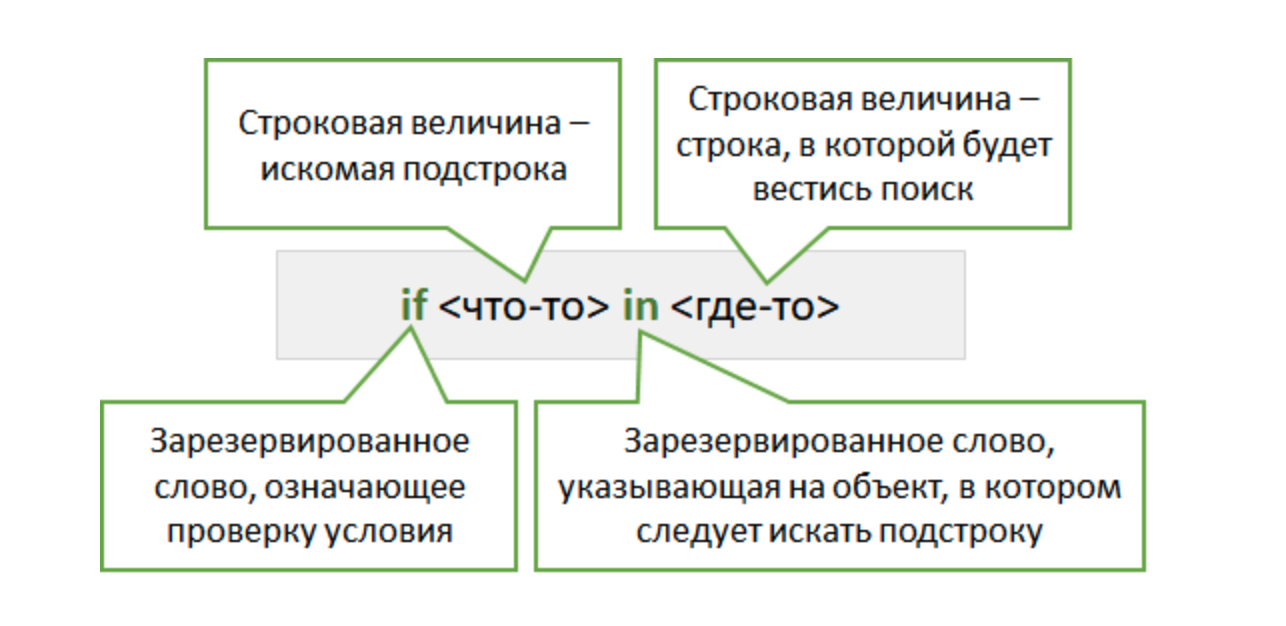

Давайте рассмотрим применение этой конструкции на примере. Предположим, что у нас есть список, содержащий названия десяти самых крупных городов России:

In [12]:
city_list = ['Москва', 'Санкт-Петербург', 'Новосибирск', 
             'Екатеринбург', 'Нижний Новгород', 'Казань', 
             'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону']

Наша задача — посчитать, названия скольких городов из этого списка состоят из двух и более частей. Обычно, если название города состоит из нескольких частей, то эти части разделены либо пробелами, либо дефисами. Следовательно, мы можем проверить название каждого города на наличие одного из этих двух символов, и посчитать, сколько городов в списке удовлетворяют данному условию:

In [ ]:
counter = 0
for city in city_list:
    if ' ' in city or '-' in city:
        counter += 1
print('Число городов со сложными названиями - {}'.format(counter))

Ниже представлены результаты работы кода с краткими пояснениями:

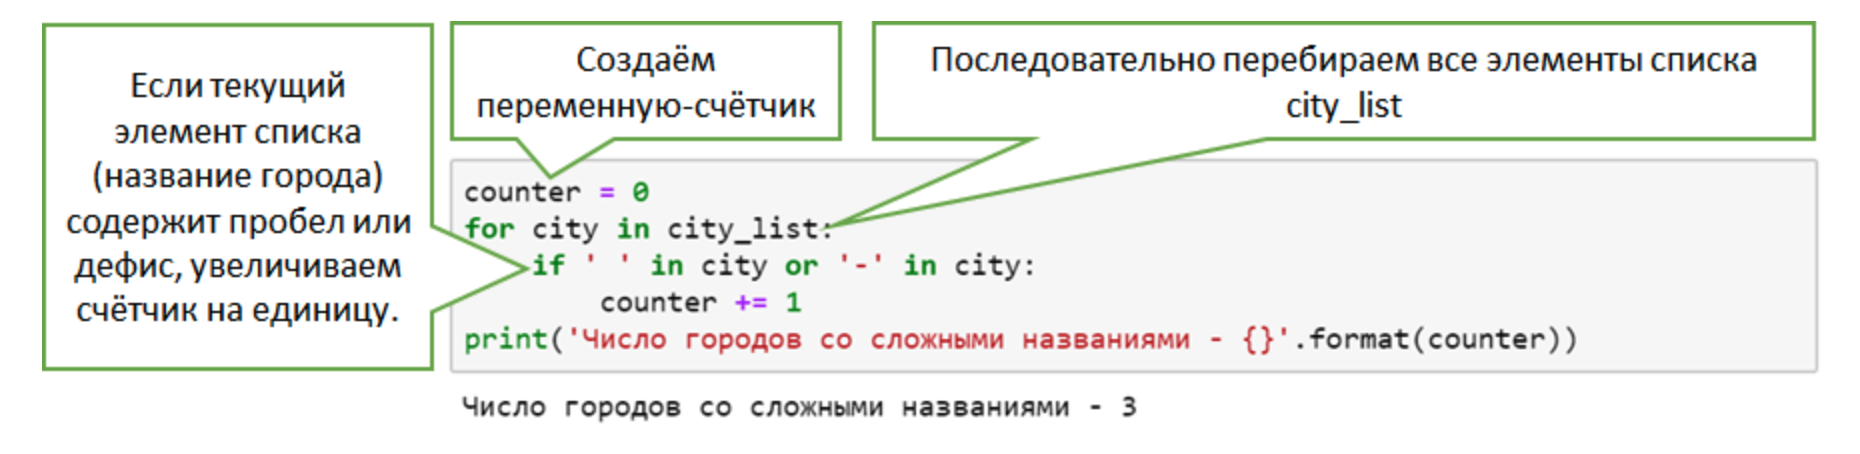

### Ищем начало подстроки

Иногда важно не только установить факт наличия подстроки в составе определённой строки, но и точно определить индекс, с которого начинается искомая подстрока. В этом случае можно воспользоваться методом find, который определяет индекс позиции, с которой начитается нужная подстрока (в качестве ответа всегда выдаётся положительный индекс), или возвращает значение -1, если искомая строка не найдена.

Рассмотрим синтаксис данного метода:

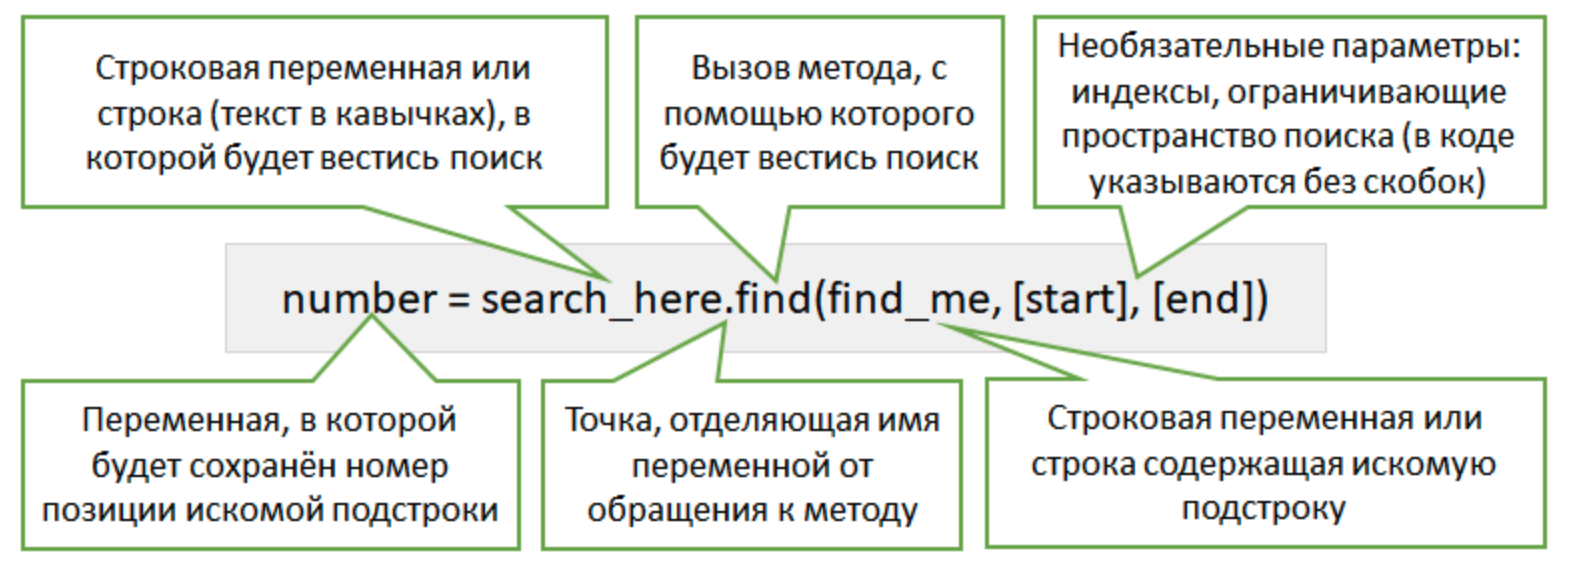

К информации, указанной на схеме, можно добавить, что если не указывать параметры [start] и [end], то поиск будет вестись во всей строке.

Рассмотрим использование этого метода на примере: дана переменная *email*, содержащая адрес электронной почты Вашего нового знакомого. Нужно извлечь из этой переменной адрес домена, на котором зарегистрирована почта. 

Суть решения  заключается в следующем: поскольку известно, что адрес домена в адресе электронной почты следует сразу после символа "@", нам достаточно узнать номер позиции, которую занимает знак "@" и извлечь из строки все символы, следующие за "@". Давайте рассмотрим код решения этой задачи:

In [19]:
email = 'VeryBigBoss@skillfactory.ru'
pos = email.find('@')
domain = email[pos+1:]

### А если совпадений несколько?

Итак, Вы научились использовать метод find для нахождения индекса, с которого начинается нужный нам фрагмент в строковой переменной. И этот метод отлично работает до тех пор, пока мы не сталкиваемся с ситуацией, при которой нужная нам подстрока встречается в строке несколько раз. Потому что пользуясь только теми инструментами, которые мы выучили на этом и предыдущем шагах, мы даже не узнаем о том, что в строке имеется несколько совпадений с искомой подстрокой. Давайте восполним этот пробел в знаниях.

#### Метод count

Для подсчёта количества вхождений подстроки в строку используется __метод count__:

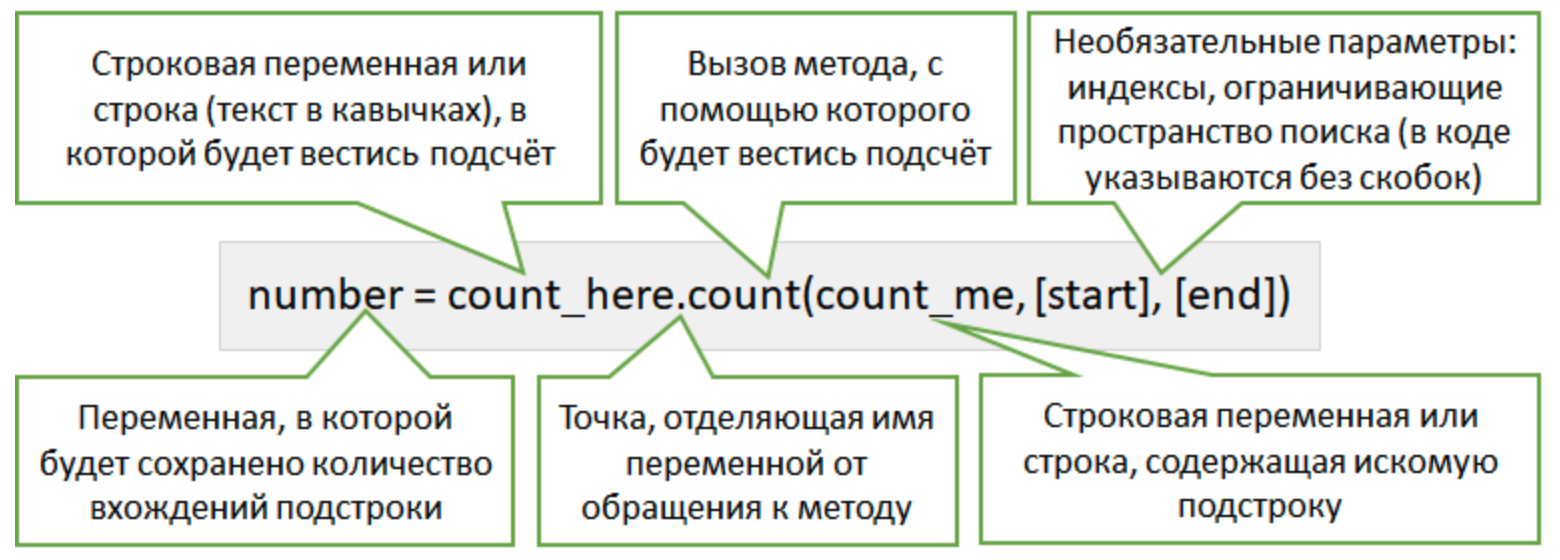

Как и в случае с методом `find`, использование параметров `[start]` и `[end]` не является обязательным. Если эти параметры не указаны, то поиск и подсчёт будут вестись во всей строке.

#### Пример

Давайте рассмотрим пример использования этого метода в решении задачи о подсчёте количества упоминаний имени "Грека" (в разных падежах) в известной скороговорке:

In [13]:
tongue_twister = 'Ехал Грека через реку, видит Грека - в реке рак. Сунул Грека руку в реку, рак за руку Греку - цап!'

Поскольку при изменении имени Грека по падежам меняется окончание, нам нужно посчитать количество вхождений основы слова (Грек_) в текст скороговорки:

In [15]:
counter = tongue_twister.count('Грек')
print(counter)

4


### И снова задачи!

Пришло время попробовать свои силы в применении на практике только что полученных знаний. На этот раз Вас ждут более сложные задачки, требующие изобретательности, внимания и даже определённой смелости.

Не торопитесь,  старайтесь внимательно читать условие каждого задания, обращайте внимание на требования к именам переменных и к параметрам представления результата. Обязательно тестируйте Ваш код и старайтесь убедиться в то, что он одинаково корректно работает с разными значениями входных переменных.

__Успехов Вам!__

#### А3.2.2.1 Задание 1

In [18]:
proverbs = ['Без труда не вытянешь и рыбку из пруда', 
            'Терпение и труд всё перетрут', 
            'Работа не волк - в лес не убежит', 
            'Чем труднее дело, тем выше честь', 
            'Учиться, учиться и учиться!']

counter = 0
for proverb in proverbs:
    if 'труд' in proverb:
        counter += 1

Что будет храниться в переменной counter после выполнения кода, приведённого выше?
- количество пословиц о труде
- список пословиц о труде
- список пословиц, содержащих слово "труд"
- количество пословиц, содержащих слово "труд" и однокоренные слова верно __(+)__
- список пословиц, содержащих слово "труд" и однокоренные слова

#### А3.2.2.2 Задание 2

In [17]:
proverb = 'Хорошо написанная программа - это программа, написанная 2 раза'

while True:
    index = proverb.find('программа')
    if index == -1:
        break
    secret = proverb[:index].split()[-1]
    proverb = proverb[index+9:] 

Изучите код, представленный выше. Что хранится в переменной _`secret`_ ?
- слово, предшествующее слову "программа" верно __(+)__
- слово, следующее за словом "программа"
- номер позиции, с которой начинается слово "программа"
- номер позиции, с которой начинается слово, предшествующее слову "программа"
- количество вхождений слова "программа" в переменную proverb

#### А3.2.2.3 Задание 3

Дана переменная _`email`_ , содержащая произвольный адрес электронной почты. Напишите универсальный метод, с помощью которого можно извлечь из этого адреса адрес домена.

Пояснения:
Код должен быть написан в одну строку без пробелов.
Не используйте никаких дополнительных имен переменных, кроме переменной email.
Не присваивайте результат извлечения никакой другой переменной.
Используйте апастрофы (не кавычки!) для обозначения символа, позицию которого нужно найти в строке.

In [ ]:
email[email.find('@')+1:]

#### А3.2.2.4 Задание 4*

Дано вещественное число. Напишите программу, которая считает сумму цифр дробной части числа. Результат вычислений нужно вывести на экран с помощью функции print

Используйте переменную **`number = 56.257`** для хранения заданного числа и **не меняйте её в процессе выполнения кода**.

In [22]:
number = 56.257
i = str(number)[str(number).find('.') + 1:] # Отделяем дробную часть числа
cont = 0
for n in i:
    cont += int(n)
print(cont)

14


#### А3.2.2.5 Задание 5**

Дан список emails_list, содержащий электронные адреса десяти человек. Вам нужно написать программу, которая создаёт словарь emails_dict. Ключами словаря должны быть адреса доменов, а значениями - количество электронных адресов из списка emails_list, зарегистрированных на каждом домене.

In [ ]:
emails_list = ['vasya@mail.ru', 
          'akakiy@yandex.ru', 
          'spyderman@yandex.ru', 
          'XFiles@gmail.com', 
          'hello@mail.ru', 
          'noname@gmail.com', 
          'DonaldTrump@mail.ru', 
          'a768#af@yandex.ru', 
          'Ivan_Ivanovich@yandex.ru', 
          'thebestmail@yandex.ru']
      

Внимание! На данном этапе обучения это задание по-настоящему сложное, поэтому если у Вас нет никаких идей о том, как его выполнить - пропустите этот шаг. В блоке А3.4 будет рассмотрен алгоритм, который можно использовать при создании словаря. После изучения данного блока Вы можете вернуться к этому заданию и повторить попытку.

In [23]:
emails_list = ['vasya@mail.ru', 
          'akakiy@yandex.ru', 
          'spyderman@yandex.ru', 
          'XFiles@gmail.com', 
          'hello@mail.ru', 
          'noname@gmail.com', 
          'DonaldTrump@mail.ru', 
          'a768#af@yandex.ru', 
          'Ivan_Ivanovich@yandex.ru', 
          'thebestmail@yandex.ru']

emails_dict = {}
domain_list = []

for i in emails_list:
    domain_list.append(i[i.find('@')+1:])

import collections
c = collections.Counter()
for n in domain_list:
    c[n] += 1
emails_dict = dict(c)

## A3.2.3 Преобразование строк

### Можно ли изменить неизменяемый объект?

Самые внимательные наверняка обратили внимание на то, что название данного раздела несколько некорректно: приступая к изучению строковых величин мы говорили о том, что строка — это неизменяемый объект. Так как же можно изменить то, что по определению неизменно?

На самом деле понятие неизменяемости — более гибкое, чем кажется на первый взгляд. В Python предусмотрено несколько методов, которые можно применять к строкам и с помощью которых строка как-то меняется (допустим, все заглавные буквы в строке переводятся в нижний регистр и «превращаются» в строчные). И суть неизменяемости строки выражается в том, что при использовании метода строка изменится только на то время, пока выполняется команда. Само значение строковой переменной останется прежним.

Сложно?

Запутанно?

Непонятно?

#### Давайте разбираться!

### Буквы большие и маленькие

Итак, давайте начнём с двух методов, с помощью которых можно перевести все буквы строки в верхний или нижний регистр. Речь идёт о методах [lower()](https://docs.python.org/3.7/library/stdtypes.html?highlight=lower#str.lower) и [upper()](https://docs.python.org/3.7/library/stdtypes.html?highlight=upper#str.upper).

Давайте рассмотрим ситуацию, когда использование этих методов может существенно облегчить работу по созданию пользовательского интерфейса (на самом деле ситуация будет сильно упрощена по сравнению с реальными проектами, где предусмотрено активное взаимодействие с пользователем). Допустим, на каком-то этапе работы программы пользователь должен ввести ответ на вопрос, на который можно ответить "да" или "нет". При вводе данных пользователь может написать ответ с маленькой или большой буквы, у него может быть включен CapsLock, и тогда все буквы получатся заглавными. Ну и, наконец, самые креативные пользователи могут выдать ответ, первая буква в котором будет строчная, а вторая — заглавная. При работе со строками все эти варианты будут восприниматься компьютером как разные значения, и чтобы правильно отреагировать на введённый пользователем ответ, нам пришлось бы написать код вроде этого:

In [ ]:
answer = input('Введите ДА или НЕТ: ')
if answer == 'ДА' or answer == 'да' or answer == 'Да' or answer == 'дА':
    print('Вы ответили "ДА"! Я счастлив!')

In [ ]:
answer = input('Введите ДА или НЕТ: ')
if answer.lower() == 'да':
    print('Вы ответили "ДА"! Я счастлив!')

Так гораздо компактнее, не правда ли? Дополнительным бонусом в этой ситуации будет то, что после применения метода lower() значение переменной answer не изменилось и мы можем использовать его в оставшейся части кода в том виде, в котором это значение ввёл пользователь.

### Замена символов

В _Python_ есть много очень мощных способов обработки данных, и это — одна из причин растущей популярности данного языка программирования. Но к сожалению очень часто данные, которые предстоит обработать, не подготовлены для работы. Одна из весьма распространённых проблем связана с тем, что числовые данные поступают в текстовом формате, и при этом у дробных чисел в качестве десятичного разделителя используется не точка, а запятая. Перевести такое «**число**» в формат _float_ на _Python_ невозможно: интерпретатор прервёт выполнение программы и выдаст сообщение об ошибке:

In [ ]:
float('3,14')

Для корректного преобразования такой строки в вещественное число мы должны сначала заменить использующуюся в качестве разделителя запятую на точку. Это можно сделать с помощью метода [replace()](https://docs.python.org/3.7/library/stdtypes.html?highlight=replace#str.replace).

__Важно!__

Поскольку с преобразованными строками планируется дальнейшая работа, нам обязательно нужно будет сохранить результат их преобразования в новую переменную или структуру данных.

Давайте рассмотрим более развёрнутый пример:

In [ ]:
new_numbers = []
for number in '3,14 2,71 6,02 11,22 123,987'.split():
    new_numbers.append(float(number.replace(',', '.')))

В данном коде мы работаем со строкой, содержащей вещественные числа, в которых десятичным разделителем является запятая. Суть алгоритма состоит в следующем:

- Создаём список, в который будем последовательно добавлять преобразованные числа, переведённые в нужный формат.
- Преобразуем строковую переменную в список (элементы списка — по-прежнему строковые величины) и перебираем этот список в цикле с параметром.
- На каждом шаге цикла меняем в очередном "числе" запятую на точку, переводим преобразованную строку в тип float и добавляем полученное число в список new_numbers.

In [ ]:
print(new_numbers)

### Настало время для практики!

Ну что же, давайте попробуем применить наши новые знания на практике. В задачах этого блока нужно уделять особо пристальное внимание тому, как Вы сохраняете (и сохраняете ли!) результат преобразования строки. Сконцентрируйтесь и у Вас всё получится!

__Удачи!__

#### А3.2.3.1 Задание 1

In [ ]:
string = 'Интернет-открытки - это лучшее средство для мужчины сказать женщине о своих чувствах прямо в глаза.'
secret = string[24:30]
new_string = string.replace(secret.lower(), secret.upper()) 

Чему будет равно значение переменной secret после выполнения кода, представленного выше?
- Интернет
- ИНТЕРНЕТ
- лучшее __(+)__
- ЛУЧШЕЕ
- Лучшее

#### А3.2.3.2 Задание 2

Вам нужно написать код, который спрашивает у пользователя о его любимом блюде. Если пользователь отвечает, что любит овсянку, компьютер должен вывести на экран сообщение: "Да Вы гурман!"

Какой из предложенных вариантов является наиболее корректным и универсальным?

- if food() == 'овсянка': print('Да Вы гурман!')
- if food.lower() == 'овсянка': print('Да Вы гурман!') __(+)__
- if food.upper() == 'овсянка': print('Да Вы гурман!')
- if food.replace('О', 'о') == 'овсянка': print('Да Вы гурман!')
- Все ответы неправильные, т.к. команду print надо печатать с новой строки

#### А3.2.3 Задание 3

Дана строковая переменная string. Вам нужно изменить эту переменную так, чтоб она была написана с заглавной буквы. Какой вариант кода лучше всего подходит для эффективного решения этой задачи?

__Примечание__: не принимайте во внимание изменение остальных букв в строке после выполнения преобразования.

- string.replace(string[1].lower(), string[1].upper())
- string.replace(string[0], string[0].upper())
- string = string.replace(string[1].lower(), string[1].upper())
- string = string.replace(string[0], string[0].upper()) __(+)__
- Все ответы неверны, т.к. строковые переменные - это неизменяемые величины

#### А3.2.3.4 Задание 4

Дана переменная string, в которой нужно заменить все знаки препинания на смайлики (':)'). Знаками препинания считайте символы: точка, запятая, двоеточие, тире (дефис), восклицательный и вопросительный знаки. Значение переменной string должно измениться в процессе выполнения программы.

Решите задачу для string = 'Тяжёлая интернет-зависимость - это когда ты выходишь из интернета, а он из тебя нет.'

Пример:
исходное значение переменной: string = 'Привет, Андрей!'
итоговое значение переменной: string = 'Привет:) Андрей:)'

In [ ]:
#Вариант № 1
string = 'Тяжёлая интернет-зависимость - это когда ты выходишь из интернета, а он из тебя нет.'
string = string.replace(':', ':)')
string = string.replace('.', ':)')
string = string.replace(',', ':)')
string = string.replace('-', ':)')
string = string.replace('!', ':)')
string = string.replace('?', ':)')

#Вариант № 2
string = 'Тяжёлая интернет-зависимость - это когда ты выходишь из интернета, а он из тебя нет.'
symbol_marks='.,:-!?'
marks=':)'
for letter in string:
    if letter in symbol_marks:
        string=string.replace(letter,marks)
print(string)

#### А3.2.3.5 Задание 5*

Дана переменная name, в которой хранится имя пользователя, записанное русскими буквами. Напишите программу, которая перебирает имя по буквам и для каждой буквы выводит сообщение: "... - гласная буква" или "... - согласная буква", где вместо многоточия нужно подставить букву из имени пользователя.

Значение переменной name не должно меняться в ходе выполнения программы. В сообщениях, выводимых на экран, буквы из имени пользователя должны выводиться в том же регистре, в котором они присутствуют в переменной name.

Решите задачу для name = 'Севастиан'

Пример работы программы для имени Анна:
А - гласная буква
н - согласная буква
н - согласная буква
а - гласная буква

Подсказка: чтобы избавить себя от необходимости выполнять проверку сложного составного условия, Вы можете создать два списка с буквами: в одном хранить гласные буквы, а в другом - согласные.

In [ ]:
#Вариант № 1
name = 'Севастиан'
glasnie = 'а, е, ё, и, о, у, ы, э, ю, я'.split(', ')
for i in name:
    if i.lower() in glasnie:
        print('{} - гласная буква'.format(i))
    else:
        print('{} - согласная буква'.format(i))
        
#Вариант № 2
name = 'Севастиан'
vowels=['а','о','и','е','ё','э','ы','у','ю','я']
consonants=['б','в','г','д','ж','з','й','к','л','м','н','п','р','с','т','ф','х','ц','ч','ш','щ']
for letter in name:
    if letter.lower() in vowels:
        print('{} - гласная буква'.format(letter))
    elif letter.lower()  in consonants:
        print('{} - согласная буква'.format(letter))

## А3.3.1 Синтаксис регулярных выражений

### Когда детали неизвестны...

В реальной практике мы очень часто сталкиваемся с ситуациями, когда точная структура искомой подстроки неизвестна. К примеру, нам нужно выделить из текста номера банковских карт или адреса электронной почты.

Как действовать в этом случае? Неужели нужно создавать десятки образцов и пытаться искать каждый из них в исходной строковой переменной? Или нужно составлять сложную систему условий, с помощью которой можно будет извлечь нужную подстроку?

К счастью, в Python есть очень мощный инструмент, который позволяет искать строковые величины на основе общего описания структуры искомой подстроки. Данный инструмент называется регулярные выражения.

__Регулярные выражения__ — это формальный язык, основанный на использовании метасимволов (или так называемых символов-джокеров), который применяется для работы с подстроками в тексте.

Для освоения даже базовых приёмов работы с регулярными выражениями придётся потратить некоторое время для заучивания метасимволов и отработки навыков по созданию шаблонов. Однако в будущем Вы сможете сэкономить гораздо больше времени при написании кода, в котором будут обрабатываться строковые данные.

Итак, давайте инвестируем некоторое количество времени в своё безоблачное будущее! :)

### Как составить регулярное выражение: метасимволы и простые шаблоны

Итак, главный секрет универсальности и гибкости регулярных выражений заключается в том, что при создании подстроки мы можем использовать так называемые метасимволы, или символы подстановки. Метасимволы используются для замены других символов или их последовательностей. В результате получается не строгая структура подстроки, а своеобразный шаблон, который может быть соотнесён с несколькими вариантами реальных строк.

Возможно, пока это выглядит не особенно понятно. Чтобы прояснить ситуацию, давайте рассмотрим базовую информацию о метасимволах и их назначении при работе с регулярными выражениями. В таблице ниже представлены наиболее важные символы, использующиеся при создании регулярных выражений и примеры их применения. 



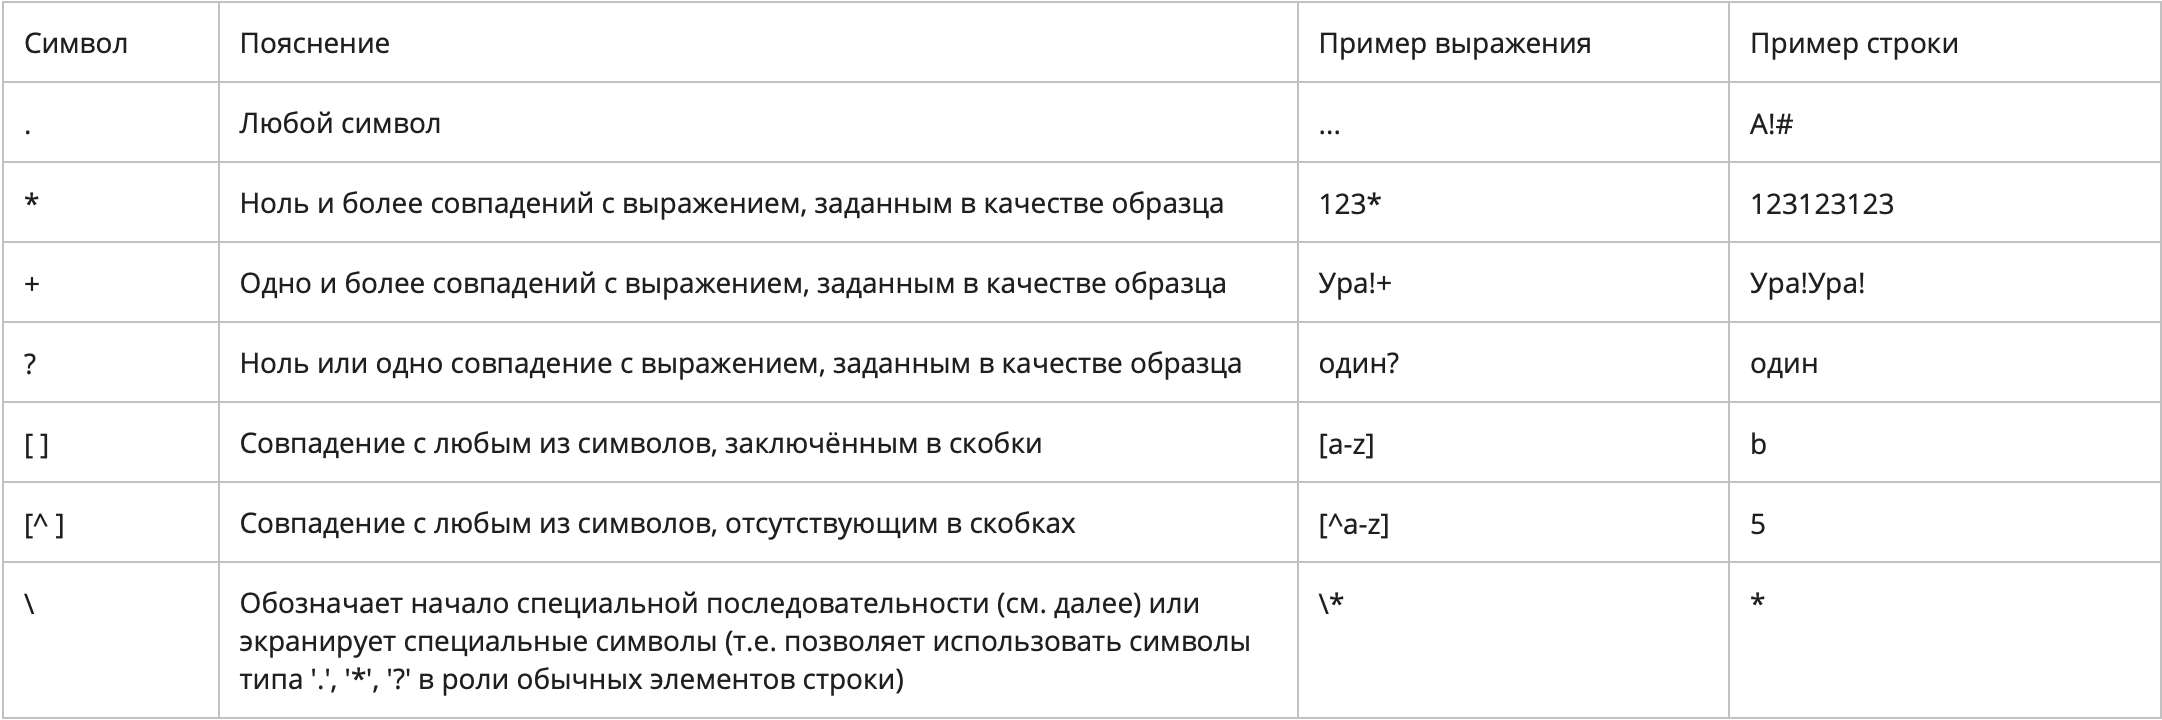

В приведённой выше таблице отмечены две роли метасимвола '\'. С одной стороны, данный символ позволяет __экранировать метасимволы__, благодаря чему мы можем использовать точку, вопросительный знак, квадратные скобки и другие метасимволы по их прямому назначению (т.е. как обычную точку или вопросительный знак). Второе назначение обратного слэша — __это сигнал о начале специальной последовательности__, с помощью которой можно заменить определённую группу символов. Примеры таких последовательностей представлены в таблице ниже:

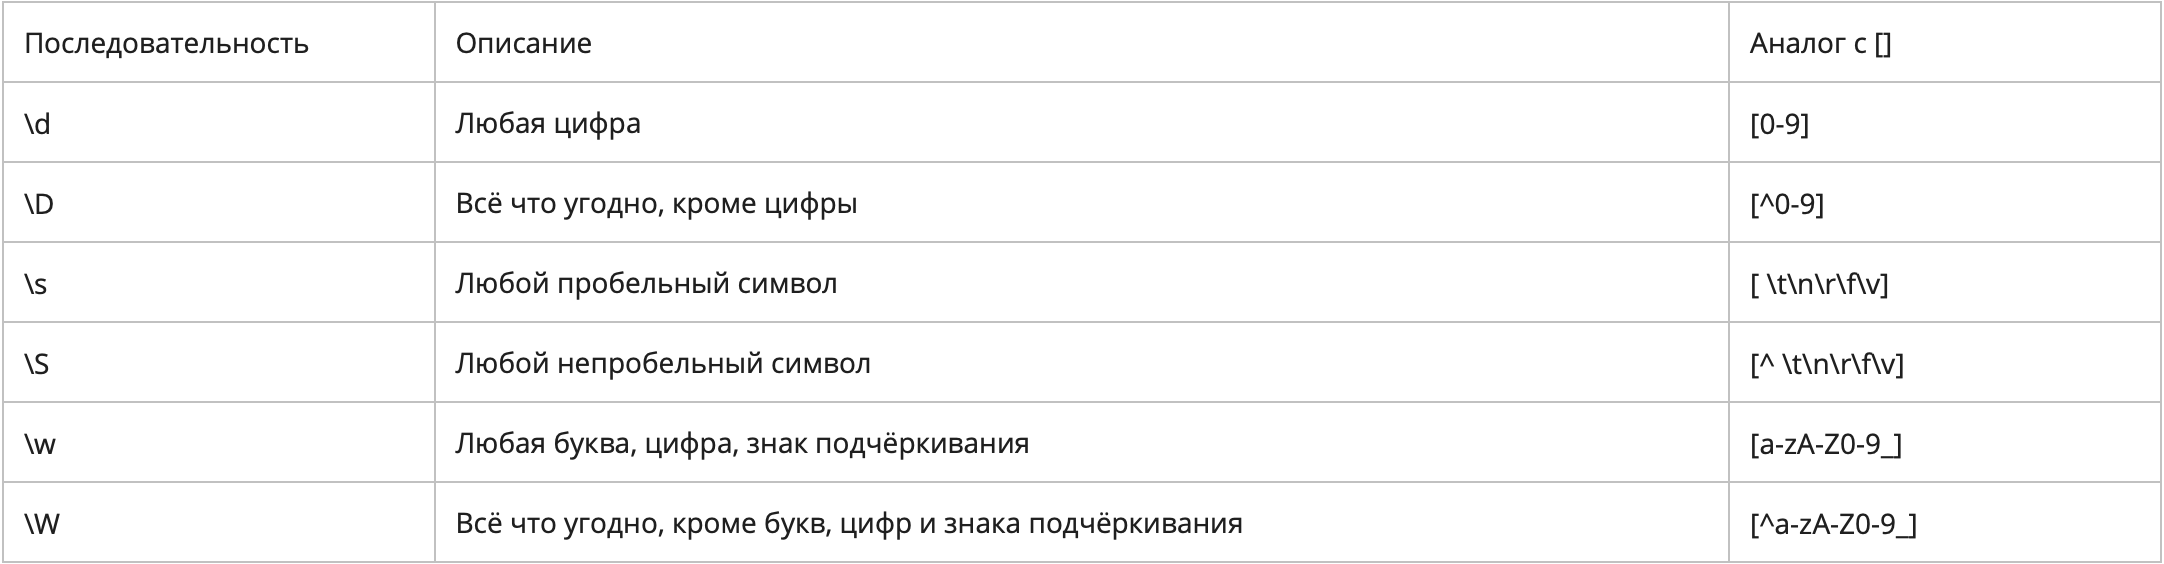

### Настало время тренировки!

Пока мы не научились использовать регулярные выражения при написании кода программы, поэтому на этом этапе работы Вам придется полагаться только на свою внимательность.

Не страшно, если что-то не получится с первого раза. Продолжайте Ваши попытки — и успех обязательно придёт!

P.S. Если всё-таки пока Вам сложно разбираться в деталях синтаксиса регулярных выражений, при выполнении заданий Вы можете использовать онлайн-помощник.

[Этот сайт](https://regex101.com) отличается очень простым интерфейсом, но при этом отлично справляется с задачей нахождения совпадений между регулярным выражением, которое нужно указывать в поле *"Regular Expression"* и строкой, которую нужно ввести в поле "Text String".

На [этом сайте](https://regexr.com) помимо установления соответствия между регулярным выражением и строкой Вы сможете увидеть дополнительные пояснения о том, что означает каждый элемент используемого при проверке регулярного выражения.

Оба сайта имеют только англоязычный интерфейс.



#### А3.3.1.1 Задание 1

Какой из шаблонов описывает структуру переменной _`string`_ :

string = '123'

- \d\d\d __(+)__
- \D\D\D
- [0-9]
- [^0-9]*

#### А3.3.1.2 Задание 2

Какие из шаблонов корректно описывают структуру переменной _`string`_ ?

string = '321'

- \d* __(+)__
- \D*
- [0-9]* __(+)__
- [0-9][0-9][0-9] __(+)__
- \w* __(+)__

#### А3.3.1.3 Задание 3

Структуру каких строк из представленных ниже корректно описывает данный шаблон:

[А-Я][а-я]*

- Маша __(+)__
- Саша __(+)__
- Оля __(+)__
- МУРКА
- Я __(+)__

#### А3.3.1.4 Задание 4

Какой из шаблонов представленных ниже, корректно описывает структуру переменной string?

string = '2 * 2 = 4'

- \d\s\*\s\d\s\W\s\d __(+)__
- \d\S\*\S\d\S\W\S\d
- [0-9] * [0-9] = [0-9]
- \w * \w = \w
- \D * \D = \D

#### А3.3.1.5 Задание 5

Структуру каких строк из представленных ниже корректно описывает данный шаблон:

\d* \+\s[0-9]* \W\s\d+

- 25 + 115 = 140 __(+)__
- 1+ 1=2
- 333 + 222 ? 555 __(+)__
- 13 + 0 = 13 __(+)__
- a + b = c

## A3.3.2 Модуль re

### Умеет ли Python работать с регулярными выражениями?

Казалось бы, что за глупый вопрос? Если в курсе по основам программирования на Python мы изучаем тему "Регулярные выражения", значит опция по работе с регулярными выражениями в этом языке точно присутствует. Однако на самом деле всё не так просто.

Методы и функции, предназначенные для работы с регулярными выражениями, не входят в базовый функционал языка Python. Тем не менее, эта проблема легко разрешима. При разработке программ на Python мы можем, помимо использования стандартной библиотеки, подключать дополнительные библиотеки и модули, тем самым расширяя свои возможности по созданию программ. Для Python написано огромное количество модулей и библиотек, и со многими из них Вы познакомитесь на нашем курсе. Сегодня же мы начнём серию этих знакомств с первого дополнительного модуля, который позволит Вам проделывать интересные трюки с регулярными выражениями. 

##### Модуль re

Для работы с регулярными выражениями необходимо подключить __дополнительный модуль__, который называется __re__. Подключение происходит с помощью команды *import*, после которой необходимо указать имя модуля:

In [2]:
import re

После запуска на работу ячейки, содержащей этот код, нам будут доступны все функции и методы для работы с регулярными выражениями.

Давайте загрузим модуль re и поэкспериментируем с его функционалом.

### Ищем паттерны

Прежде всего, чтобы у нас появилась возможность использовать методы модуля re, нам необходимо создать объект, к которому все эти методы могут быть применимы. Таким объектом является шаблон, или паттерн, создаваемый с помощью функции [compile](https://docs.python.org/3/library/re.html#re.compile).

#### Важно!

Для вызова функции, которая является частью загруженного модуля, необходимо сначала указать имя модуля, и далее, через точку, указать имя функции.

Давайте попробуем создать паттерн, соответствующей строке, которая начинается с большой русской буквы, за которой могут (но не обязательно) следовать несколько маленьких русских букв. Заканчиваться наша строка должна будет (теперь уже обязательно!) каким-либо небуквенно-цифровым символом. В этом примере мы назовём нашу переменную pattern, но можно использовать и любое другое имя.

In [3]:
pattern = re.compile('[А-Я][а-я]*\W')

Итак, образец для поиска готов, и настало время начать использовать его в работе со строками.

### Способы поиска паттернов.

В __модуле re__ есть несколько методов, которые можно использовать для поиска паттернов:

| Метод | Назначение | Результат |
|--|--|--|
|[match](https://docs.python.org/3/library/re.html#re.Pattern.match)|Ищет символы, соответствующие шаблону, __в начале строки__, указанной в параметрах метода.|None, если совпадений не найдено, и объект типа match object ([mobj](https://docs.python.org/3/library/re.html#match-objects)), если подстрока заданной структуры найдена|
|[search](https://docs.python.org/3/library/re.html#re.Pattern.search)|Ищет символы, соответствующие шаблону, __во всей строке__, указанной в параметрах метода.|None, если совпадений не найдено, и объект типа match object, если подстрока заданной структуры найдена|
|[findall](https://docs.python.org/3/library/re.html#re.Pattern.findall)|Ищет символы, соответствующие шаблону, во всей строке, указанной в параметрах метода.|Список всех не перекрывающихся совпадений с шаблоном|

Давайте попробуем применить каждый из указанных методов к нашему паттерну. Тренироваться будем на фразе:

In [4]:
string = '!!! Йо! Учиться, учиться и учиться! Вперёд! Только вперёд!' 

Итак, давайте попробуем последовательно использовать данную фразу как параметр каждого из методов:

In [5]:
pattern.match(string)

pattern.search(string)

pattern.findall(string)

['Йо!', 'Учиться,', 'Только ']

Итак, анализ результатов показал нам следующее:

- __метод match__ не вернул нам ничего (точнее, вернул нам "Ничего", или None-значение), т.к. строка начинается с трёх восклицательных знаков, что не соответствует заданному шаблону;
- __метод search__ нашёл только первое вхождение строки, совпавшей с шаблоном; данное вхождение соответствует подстроке "Йо!", и занимает позиции с 4 по 7;
- __метод findall__ вернул список из трёх элементов, соответствующих заданной строке; кстати, обратите внимание, что слово "Вперёд" из-за присутствующей в нём буквы "ё" не было включено в список.

### Настало время тренировки!

Итак, пришло время применить новые знания на практике. Все задания, которые мы будем выполнять в этом блоке, будут связаны с исследованием вот этой текстовой переменной, содержащей краткую информацию об истории языка Python:

In [6]:
text = 'Разработка языка Python была начата в конце 1980-х годов сотрудником голландского института CWI Гвидо ван Россумом. Для распределённой ОС Amoeba требовался расширяемый скриптовый язык, и Гвидо начал писать Python на досуге, позаимствовав некоторые наработки для языка ABC (Гвидо участвовал в разработке этого языка, ориентированного на обучение программированию). В феврале 1991 года Гвидо опубликовал исходный текст в группе новостей alt.sources. Название языка произошло вовсе не от вида пресмыкающихся. Автор назвал язык в честь популярного британского комедийного телешоу 1970-х "Летающий цирк Монти Пайтона".'

Загрузите значение этой переменной в память компьютера и приготовьтесь искать в ней разную информацию.

#### А3.3.2.1 Задание 1
Укажите индекс, с которого в переменной `text` начинается подстрока, соответствующая паттерну:

\d+

- 1
- 19
- 44 __[верно]__
- 48
- Переменная text не содержит подстроки, соответствующей такому шаблону

#### А3.3.2.2 Задание 2
Какие элементы переменной `text` соответствуют данному паттерну:

[A-Za-z]+

- все слова на английском языке __[верно]__
- все аббревиатуры
- все аббревиатуры на английском языке
- все слова, которые есть в тексте
- Переменная text не содержит подстроки, соответствующей такому шаблону

#### A3.3.2.3 Задание 3
Какие элементы переменной `text` соответствуют данному паттерну:

[А-Яа-я]+ка

- все слова, начинающиеся на "ка"
- все слова, заканчивающиеся на "ка"
- все слова, содержащие "ка" в любой своей части
- все слова, содержащие "ка" в любой части, кроме начала слова __[верно]__
- Переменная text не содержит подстроки, соответствующей такому шаблону

#### A3.3.2.4 Задание 4
Используя возможности модуля re определите, сколько слов, содержащих русские буквы "а" и "и", разделённые любыми двумя буквами, содержится в переменной text. Введите количество слов в поле для ответа.

Ответ: 4

In [20]:
#Solution

pattern = re.compile('\w*[аА]\w\w[иИ]\w*')
print(len(pattern.findall(text)))

4


#### А3.3.2.5 Задание 5*
Используя возможности модуля re определите количество пар слов, в которых первое слово заканчивается на гласную русскую букву, а второе начинается на согласную (также русскую). Введите количество найденных пар слов в поле для ответа.

Во время подсчёта не учитывайте регистр букв (т.е. при подсчёте должны учитываться как вариант: "...а П..." , так и вариант: "...а п..." ). Предлоги и союзы считайте полноправными словами, даже если они состоят из одной буквы.

Если между словами имеется знак препинания - считайте, что эти два слова НЕ удовлетворяют критерию поиска (т.е. вариант: "...а, П..." НЕ должен учитываться при подсчёте).

Ответ: 22

In [24]:
#Solution
pattern = re.compile('[аиоуеёюэыя]\s[бвгджзйклмнпрстфхцчшщьъ]')
print(len(pattern.findall(text.lower()))) 
# Lower() нужен, чтобы не писать в паттерне
# не писать заглавные буквы.

22


## А3.4.1 Построчное чтение файла


#### Зачем хранить данные в текстовых файлах?

__Анализ данных__ — это один из важнейших трендов современной экономики. Наверняка в своей профессиональной деятельности Вы не раз сталкивались с необходимостью анализировать данные и принимать решения, основываясь на результатах этого анализа.

Обычно мы храним данные в таблицах и обрабатываем эти таблицы в специализированных программах, например, в MS Excel. Однако очень часто по-настоящему большие объёмы данных хранятся в текстовых файлах и обрабатываются с помощью специально созданных скриптов на разных языках программирования, в том числе на Python. Текстовый файл можно читать построчно, не загружая его целиком в оперативную память компьютера. Этот приём позволяет работать с файлами любого размера, во много раз превышающими размер оперативной памяти.

Сегодня мы впервые попробуем освоить основные техники работы с текстовыми файлами. Научимся извлекать из них информацию с помощью функций и методов, доступных в стандартной библиотеке Python, и обрабатывать полученные данные.

#### Знакомство с файлом
Все упражнения этого модуля мы будем выполнять на примере файла, в котором приводятся данные о результатах экзаменов, которые сдавали абитуриенты зарубежных университетов. Для подготовки к работе [скачайте](https://lms.skillfactory.ru/assets/courseware/v1/f7a3b96762c57dbff85d27aeb50d28fb/asset-v1:Skillfactory+PY-28+14AUG2019+type@asset+block/StudentsPerformance.csv) файл.



__Важно!__

Файл нужно сохранить в той же папке, в которой находится ноутбук с кодом для этого модуля.

Файл имеет расширение csv. Аббревиатура [CSV](https://ru.wikipedia.org/wiki/CSV) расшифровывается как __Comma-Separated Values__ — значения, разделённые запятыми. Это разновидность текстового файла, в котором каждая строка условно представляет строку таблицы, а данные, разделённые запятыми, представляют информацию из разных столбцов.

Наша "таблица" содержит информацию о 1000 абитуриентах. Информация разбита на 6 категорий:

- gender — пол абитуриента;
- race/ethnicity — национальность (зашифрована в виде значений "Group A", "Group B" и т.д.);
- parental level of education — уровень образования родителей;
- lunch — насколько качественно пообедал абитуриент перед тестом;
- test preparation course — закончил ли абитуриент подготовительные курсы;
- math score — оценка по математике;
- reading score — оценка по чтению;
- writing score — оценка по письму.

Давайте попробуем открыть этот файл с помощью скрипта на Python.

#### Учимся читать текстовые файлы

Итак, нашу работу с файлом мы начнём с создания объекта, содержащего ссылку на файл. Назовём этот объект *f*:

In [25]:
f = open('StudentsPerformance.csv') 

Обратите внимание, что для создания объекта *f* мы использовали __функцию__ [open](https://docs.python.org/3.7/library/functions.html#open). Эта функция не загружает весь файл в память (мы помним, что размер файла может быть гораздо больше размера памяти!), а создаёт некий объект-посредник, через который мы можем выполнять с файлом различные манипуляции, включая построчное чтение.

Работу с файлом давайте начнём с перебора строк и вывода их на экран. __Внимание!__ Файл содержит 1000 строк, поэтому будьте готовы к тому, что в ячейку Out загрузится много информации!

In [26]:
for line in f:
    print(line)

"gender","race/ethnicity","parental level of education","lunch","test preparation course","math score","reading score","writing score"

"female","group B","bachelor's degree","standard","none","72","72","74"

"female","group C","some college","standard","completed","69","90","88"

"female","group B","master's degree","standard","none","90","95","93"

"male","group A","associate's degree","free/reduced","none","47","57","44"

"male","group C","some college","standard","none","76","78","75"

"female","group B","associate's degree","standard","none","71","83","78"

"female","group B","some college","standard","completed","88","95","92"

"male","group B","some college","free/reduced","none","40","43","39"

"male","group D","high school","free/reduced","completed","64","64","67"

"female","group B","high school","free/reduced","none","38","60","50"

"male","group C","associate's degree","standard","none","58","54","52"

"male","group D","associate's degree","standard","none","40","52","43"


Итак, мы видим, что в первой строке файла содержатся заголовки, а во всех остальных — основные данные в строковом формате.

#### Считаем девочек и мальчиков
Давайте попробуем ещё раз перебрать все строки файла, извлечь из них информацию про пол каждого из абитуриентов и посчитать соотношение мальчиков и девочек среди сдающих экзамен.

__Сначала опишем порядок наших действий:__

1. Создаём две переменные-счётчика для подсчёта количества мальчиков и девочек.
2. Организуем цикл с параметром для построчного чтения файла. На каждом шаге цикла параметр будет принимать значение очередной строки.
3. Превращаем строку в список с помощью __метода split__. В качестве разделителя указываем запятую.
4. Извлекаем из списка первый элемент и отрезаем от него первый и последний символы (кавычки).
5. Смотрим, чему равно значение извлечённого элемента. Если это «*female*», то увеличиваем на 1 счётчик девочек, если «*male*» — то счётчик мальчиков.
6. После завершения цикла выводим содержимое обоих счётчиков на экран.

In [27]:
f = open('StudentsPerformance.csv')
males = 0
females = 0
for line in f:
    info = line.split(',')
    gender = info[0][1:-1]
    if gender == 'female':
        females += 1
    elif gender == 'male':
        males +=1
print('Мальчиков: {}, девочек: {}'.format(males, females))

Мальчиков: 482, девочек: 518


#### Упражнения

Ну что же, Вы только что совершили первый серьезный прорыв, обработав настоящий датасет (так называют файлы с данными) с настоящей информацией. Давайте попробуем закрепить успех и сделаем ещё несколько вычислений на основе информации, содержащейся в файле. 

__Важно!__

- Во всех приведённых ниже заданиях Вам нужно будет ввести в поле для ответа число, являющееся ответом на вопрос. 
- При работе с файлом не забывайте каждый раз заново создавать объект f с помощью функции open.

#### А3.4.1.1 Задание 1

У скольких абитуриентов родители имеют диплом бакалавра (bachelor's degree)?

Введите ответ в виде целого числа. При написании кода обратите внимание на использование кавычек/апострофов

Ответ: 118

In [28]:
# Solution
f = open('StudentsPerformance.csv')
count = 0
for line in f:
    info = line.split(',')
    education = info[2][1:-1]
    if education == "bachelor's degree":
        count += 1

print(count)

118


#### А3.4.1.2 Задание 2
Сколько разных вариантов значений встречается в столбце "`parental level of education`"?

Введите ответ в виде целого числа.

__Подсказка 1__: для хранения уникальных вариантов Вы можете использовать список.

__Подсказка 2__: не забудьте, что первая строка файла содержит заголовки столбцов и не должна учитываться при обработке.

Ответ: 6

In [41]:
# Solution

f = open('StudentsPerformance.csv')
f.readline() # Пропускаем строку с заголовками
level_of_education = list() 
for line in f:
    info = line.split(',')
    education = info[2][1:-1]
    if education not in level_of_education:
        level_of_education.append(education)

print(len(level_of_education))

6


#### А3.4.1.3 Задание 3
Сколько процентов абитуриентов полноценно пообедали перед экзаменом? (У скольких процентов абитуриентов значение столбца "`lunch" = "standard`").

Ответ введите в виде десятичной дроби. Знак процента вводить не нужно.

Ответ: 64.5

In [39]:
#Solution

f = open('StudentsPerformance.csv')
f.readline() # Пропускаем строку с заголовками
count = 0
students = 0
for line in f:
    info = line.split(',')
    lunch = info[3][1:-1]
    if lunch == 'standard':
        count += 1 # считаем кол-во студентов с нужным свойством
    students += 1 # считаем количество студентов
         
print(count / students * 100)

64.5


#### А3.4.1.4 Задание 4
Сколько абитуриентов относится к этнической группе "group C"?

Введите ответ в виде целого числа.

Ответ: 319

In [45]:
#Solution

f = open('StudentsPerformance.csv')
f.readline() # Пропускаем строку с заголовками
students = 0
for line in f:
    info = line.split(',')
    race = info[1][1:-1]
    if race == 'group C':
        students += 1 # считаем количество студентов
         
print(students)

319


#### А3.4.1.5 Задание 5
Сколько разных этнических групп встречается в файле?

Введите ответ в виде целого числа.

__Подсказка 1__: для хранения уникальных вариантов Вы можете использовать список.

__Подсказка 2__: не забудьте, что первая строка файла содержит заголовки столбцов и не должна учитываться при обработке.

Ответ: 5

In [48]:
# Solution

f = open('StudentsPerformance.csv')
f.readline() # Пропускаем строку с заголовками
races = list() 
for line in f:
    info = line.split(',')
    race = info[1][1:-1]
    if race not in races:
        races.append(race)
        
print(len(races))

5


## А3.4.2 Преобразование файла в список

#### Как загрузить весь файл в память?

Решая задания предыдущего блока Вы наверняка обратили внимание, что при повторном обращении к файлу приходится каждый раз открывать его заново, и это не очень удобно. Если файл, с которым Вы работаете, действительно большой, то необходимость повторных обращений возникает нечасто, и в целом такое требование не вызывает большого дискомфорта. Но как быть, если файл имеет размер всего пару мегабайт, и Вы вынуждены пробегать по всем его строчкам каждые 10 минут?

Лучшее решение в этом случае — __загрузить весь файл в оперативную память__ в виде какого-то итерируемого объекта (Вы ведь помните, что итерируемый объект — это объект, который можно перебрать поэлементно?) и в дальнейшем работать с этим объектом.

Во второй части нашего курса Вы познакомитесь со __специальными библиотеками__, которые позволяют работать с табличными данными большого объёма. Сегодня же мы __научимся загружать__ данные файла в память в виде уже известных нам структур данных — __списков__ и __словарей__. Начнём мы со списков.

#### Считаем оценки по математике

Давайте начнём с простой задачи, цель которой — выгрузить из файла оценки, полученные абитуриентами на экзамене по математике, и сделать небольшой анализ полученных результатов.

__Давайте рассмотрим идею алгоритма, который поможет нам решить эту задачу:__

1. Создаём пустой список *math*, в который будем добавлять оценки.
2. Открываем файл и начинаем перебирать его построчно в цикле с параметром.
3. Полученную на каждом шаге цикла строку превращаем во временный список. Проверяем, чему равен первый элемент списка, и если это «"*gender*"» — пропускаем шаг, поскольку такое значение первый элемент имеет только в строке с заголовками, а эту строку обрабатывать не надо.
4. Если обрабатываемая строка — не заголовок, то извлекаем из неё элемент с индексом 5 (оценка по математике), отрезаем от него первый и последний символ (кавычки), переводим в тип int и добавляем к списку math.
5. После завершения цикла у нас будет список из 1000 элементов, содержащий оценки всех абитуриентов по математике.

In [49]:
math = []

f = open('StudentsPerformance.csv')

for line in f:
    info = line.split(',')
    if info[0] == '"gender"':
        continue
    else:
        mark = int(info[5][1:-1])
        math.append(mark) 

Имея данные обо всех оценках, мы можем, например, посчитать средний балл:

In [50]:
math_avg = sum(math)/len(math)

... и даже найти долю абитуриентов, показавших результат выше среднего:

In [51]:
above_avg = 0
for mark in math:
    if mark > math_avg:
        above_avg += 1
print(above_avg / 1000)

0.493


Итак, судя по результатам обработки данных, почти половина абитуриентов знает математику на высоком уровне.

#### Превращаем весь файл в систему вложенных списков
Давайте попробуем превратить весь файл в список, состоящий из вложенных списков. Каждый вложенный список будет содержать одну строку с данными. При этом у текстовых данных будут удалены лишние кавычки, а числовые данные будут преобразованы в тип int. Для удобства выбора приёмов работы с текстовыми и числовыми данными мы воспользуемся модулем re и будем проверять каждый элемент строки на предмет того, содержит ли он цифры. 

__Вот описание общей идеи алгоритма:__

1. Создаём паттерн, описывающий строку, состоящую только из цифр.
2. Создаём пустой список (*exams*), в который будем помещать данные.
3. Открываем файл.
4. Начинаем построчный перебор содержимого файла с помощью цикла с параметром.
5. Преобразуем содержимое строки в список (*info*), и если первым элементом списка является значение «"*gender*"» —пропускаем все остальные действия.
6. Создаём временный пустой список (*new_line*), в который мы будем помещать обработанные (лишённые кавычек и преобразованные в нужный формат) элементы строки.
7. Организуем вложенный цикл с параметром и последовательно перебираем в нём элементы строки *info*.
8. Проверяем, совпадает ли содержимое текущего элемента списка info с созданным нами паттерном (набор цифр).
9. Если текущий элемент строки содержит цифры (метод pattern.search(item)не возвращает значение  None) — извлекаем из обрабатываемого элемента строку, соответствующую паттерну (pattern.search(item)[0]), преобразуем *е* в тип *int* и добавляем к списку *new_line*; иначе добавляем к списку new_line текущее значение параметра цикла без первого и последнего символов.
10. Добавляем список *new_line* к итоговому списку exams.

In [52]:
import re
pattern = re.compile('\d+')

exams = []

f = open('StudentsPerformance.csv')

for line in f:
    info = line.split(',')
    if info[0] == '"gender"':
        continue
    else:
        new_line = []
        for item in info:
            if pattern.search(item) != None:
                new_line.append(int(pattern.search(item)[0]))
            else:
                new_line.append(item[1:-1])
        exams.append(new_line)

#### Почувствуй себя аналитиком!

Давайте попробуем решить несколько задач, связанных с оценкой успеваемости абитуриентов и качества их подготовки. На все вопросы, представленные ниже, Вам нужно будет дать ответ в виде одного числа.

__Обратите внимание__ на то, что если Вы вводите дробное число, то в качестве разделитетеля целой и дробной части должна использоваться __точка__. Если ответ нужно будет дать в округлённом виде, обратите внимание на указанную в задании точность округления.

__Удачи!__

#### А3.4.2.1 Задание 1
Вычислите средний балл абитуриентов на экзамене по чтению (`reading score`).

Введите ответ в виде одного числа. Не округляйте полученное значение.

Ответ: 69.169

In [56]:
#Solution

f = open('StudentsPerformance.csv')
scores = []

for line in f:
    info = line.split(',')
    if info[0] == '"gender"':
        continue
    else:
        score = info[6][1:-1]
        scores.append(int(score))
        
score_avg = sum(scores) / len(scores)
print(score_avg)                    

69.169


#### А3.4.2.2 Задание 2

Сколько абитуриентов получили на экзамене по чтению (`reading score`) оценку ниже среднего?

Введите количество абитуриентов в окно для ответа.

Ответ: 487

In [58]:
# Solution
# Из предыдушей задачи берем score_avg

f = open('StudentsPerformance.csv')
count = 0

for line in f:
    info = line.split(',')
    if info[0] == '"gender"':
        continue
    else:
        if int(info[6][1:-1]) < score_avg:
            count += 1
            
print(count)

487


#### А3.4.3.2.3 Задание 3
Какой средний балл на экзамене по чтению (`reading score`) получили девочки?

Ответ округлите до трёх знаков после запятой.

Ответ: 72.608

In [60]:
#Solution

f = open('StudentsPerformance.csv')
scores = []

for line in f:
    info = line.split(',')
    if info[0] == '"gender"':
        continue
    else:
        if info[0][1:-1] == 'female':
            score = info[6][1:-1]
            scores.append(int(score))
        
score_avg = sum(scores) / len(scores)
print("%.3f" % score_avg) 

72.608


#### А3.4.2.4 Задание 4

Сколько абитуриентов получили на экзамене по письму (`writing score`) оценку выше 90?

Введите количество абитуриентов в окно для ответа.

Ответ: 68

In [77]:
#Solution

f = open('StudentsPerformance.csv')
count = 0

for line in f:
    info = line.split(',')
    if info[0] == '"gender"':
        continue
    else:
        score = int(info[-1][1:-2])
        lunch = info[3][1:-1]
        if score > 90:
            count += 1
        
print(count)

68


#### А3.4.2.5 Задание 5
Сколько процентов абитуриентов, получивших на экзамене по письму (`writing score`) оценку более 90, хорошо пообедали перед экзаменом (`lunch = standard`)?

Ответ округлите до одного знака после запятой и введите без знака процента.

Ответ: 86.8

In [91]:
#Solution

f = open('StudentsPerformance.csv')
count = 0
students = 0

for line in f:
    info = line.split(',')
    if info[0] == '"gender"':
        continue
    else:
        score = int(info[-1][1:-2])
        lunch = info[3][1:-1]
        if score > 90:
            if lunch == 'standard':
                count += 1
            students += 1
            
        
result = count / students * 100
print("%0.1f" % result)

86.8


## А3.4.3 Преобразование файла в словарь

#### А нужен ли словарь?

В некоторых случаях при работе с очень большими текстовыми файлами возникает необходимость обобщения и группировки данных по определённым параметрам. Для решения такого типа задач в случае, если файл действительно большой и не помещается целиком в оперативную память, можно создать словарь, в котором будут храниться уже обработанные и сгруппированные данные. Такой словарь легко поместится в памяти компьютера, а извлечение из него нужных данных по ключам не составит большого труда.

#### Выстраиваем иерархию
Мы начнём нашу работу с создания словаря с самой простой структурой. Давайте попробуем построчно перебрать файл и создать словарь, содержащий данные о количестве студентов, относящихся к разным этническим группам. В результате работы программы наш словарь должен будет выглядеть следующим образом:

    {'group B': 190,    
    'group C': 319,
    'group A': 89,    
    'group D': 262,
    'group E': 140}

Эта задача может вызвать небольшие затруднений, поэтому мы будем решать её пошагово и, для улучшения понимания, будем заполнять код не в том порядке, в котором он будет представлен на экране, а в порядке, в котором он будет выполняться.

__Важно!__

Не запускайте код на работу, пока мы не пройдём по всему алгоритму и не составим финальную версию кода.

Итак, начнём.

1. Сначала мы выполним уже знакомые нам по предыдущему шагу действия:
2. Создадим пустой словарь (*students*), в котором будем накапливать данные.
3. Откроем файл для чтения из него данных.
4. Начнем построчно перебирать файл с помощью цикла с параметром.

Преобразуем очередную строку в список и смотрим, чему равен её первый элемент. Если элемент содержит заголовок первого столбца, то мы пропускаем последующие действия. Если обрабатываемая строка — не заголовок, то мы извлекаем из неё данные об этнической группе, к которой принадлежит студент, и присваиваем эту информацию (отбросив лишние кавычки) __переменной ethnicity__:

In [92]:
students = {}

f = open('StudentsPerformance.csv')

for line in f:
    info = line.split(',')
    if info[0] == '"gender"':
        continue
    else:
        ethnicity = info[1][1:-1]

Далее мы переходим непосредственно к заполнению словаря. Заполнение словаря нам следует начать с проверки того, содержится ли уже в словаре ключ, совпадающий с названием этнической группы, хранящимся на данный момент в переменной *ethnicity*.

Так как при обработке самых первых строк мы будем сталкиваться с ситуацией, когда соответствующий ключ в словаре отсутствует, давайте сначала напишем часть кода, которая будет выполняться именно в этом случае. Итак, если значение с нужным ключом в словаре отсутствует, нам нужно создать этот ключ и присвоить его значение единице, что будет означать, что пока мы нашли в файле только одного студента, относящегося к данной этнической группе:

In [94]:
students = {}

f = open('StudentsPerformance.csv')

for line in f:
    info = line.split(',')
    if info[0] == '"gender"':
        continue
    else:
        ethnicity = info[1][1:-1]
        if ethnicity in students:
            # Пока пропускаем этот шаг...
            pass
        else:
            students[ethnicity] = 1

Теперь нам осталось обработать последнее событие, т.е. описать действия, которые следует выполнять, если данный ключ уже есть в словаре.

По факту, если ключ в словаре уже присутствует, это означает, что при переборе строк мы уже встречали информацию о студентах, относящихся к данной этнической группе, а при обработке текущей строки нашли информацию о ещё одном таком студенте.

В этой ситуации нам нужно просто увеличить на единицу значение, которое уже хранится в словаре по данному ключу:

In [95]:
students = {}

f = open('StudentsPerformance.csv')

for line in f:
    info = line.split(',')
    if info[0] == '"gender"':
        continue
    else:
        ethnicity = info[1][1:-1]
        if ethnicity in students:
            students[ethnicity] += 1
        else:
            students[ethnicity] = 1

Итак, словарь создан. Он состоит всего из пяти строк (а не из тысячи, как весь файл), и из него можно практически мгновенно получать информацию о количестве студентов, относящихся к той или иной этнической группе:

In [96]:
students['group A']

89

In [97]:
for group, number in students.items():
    print(group, number)

group B 190
group C 319
group A 89
group D 262
group E 140


Попробуйте создать свои собственные запросы, с помощью которых можно извлечь из словаря эту и другую информацию.

#### Создаем вложенный словарь

С помощью рассмотренной выше стратегии мы можем создавать словари и с более сложной структурой. Например, давайте рассмотрим код, который подсчитывает количество студентов, относящихся к разным этническим группам а внутри каждой группы разделённых по уровню образования их родителей. 



Вот как должна выглядит часть словаря, содержащая сведения о группах В и С:

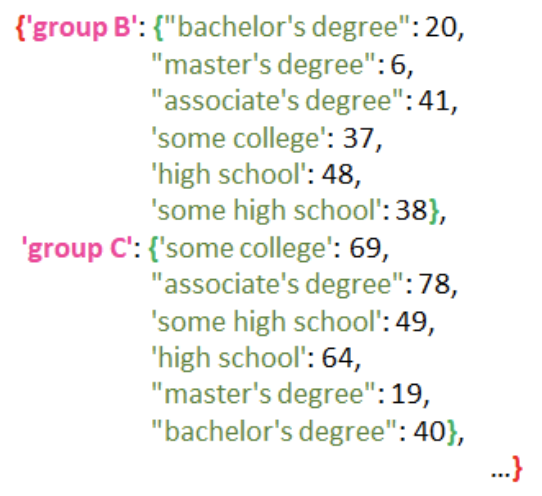

__Как мы видим, структура словаря представляет собой следующее:__

- основной словарь содержит 5 ключей, соответствующих пяти этническим группам;
- значением для каждого основного ключа является вложенный словарь, содержащий 6 ключей, соответствующих шести возможным уровням образования;
- значения внутренних словарей — это данные о количестве студентов, относящихся к данной этнической группе и имеющих родителей с соответствующим уровнем образования.

Давайте создадим такой словарь и снова, чтобы логика наших действий была максимально понятной. будем действовать постепенно и в той последовательности, в которой данные будут появляться в словаре.

Сначала мы сделаем все необходимые приготовления и убедимся в том, что обрабатываемая нами строка — это не заголовки столбцов. Если мы обрабатываем строку с реальными данными, извлекаем из неё информацию об этнической группе студента (*ethnicity*) и уровне образования его родителей (*parents*).

In [98]:
students = {}

f = open('StudentsPerformance.csv')

for line in f:
    info = line.split(',')
    if info[0] == '"gender"':
        continue
    else:
        ethnicity = info[1][1:-1]
        parents = info[2][1:-1]

Теперь проверим, есть ли уже в словаре данные о текущей (содержащейся в обрабатываемой строке) этнической группе.

Если таких данных нет (а при обработке первых строк это будет именно так), то нам надо будет сначала __создать пустой словарь__ как значение, доступное в словаре *students* по ключу *ethnicity*. После этого в пустом словаре мы создаём ключ, соответствующий уровню образования родителей студента, чьи данные представлены в текущей строке файла (*parents*), и помещаем туда значение 1. 

Проводить проверку наличия ключа parents в словаре не имеет смысла, потому что сам словарь мы создали в предыдущей строке, и сейчас там нет никаких ключей:

In [99]:
students = {}

f = open('StudentsPerformance.csv')

for line in f:
    info = line.split(',')
    if info[0] == '"gender"':
        continue
    else:
        ethnicity = info[1][1:-1]
        parents = info[2][1:-1]
        if ethnicity in students:
            # Заполним позже...
            pass
        else:
            students[ethnicity] = {}
            students[ethnicity][parents] = 1  

Теперь рассмотрим ситуацию, когда __в словаре уже есть ключ, соответствующей данной этнической группе.__ В этом случае нам нужно проверить, содержится ли во вложенном словаре *students[ethnicity]* ключ, соответствующий уровню образования родителей студента, чьи данные обрабатываются в текущей строке. Если ключа пока нет — создаём его и помещаем в него значение, равное единице:

In [100]:
students = {}

f = open('StudentsPerformance.csv')

for line in f:
    info = line.split(',')
    if info[0] == '"gender"':
        continue
    else:
        ethnicity = info[1][1:-1]
        parents = info[2][1:-1]
        if ethnicity in students:
            if parents in students[ethnicity]:
                pass
                # Заполним позже...
            else:
                students[ethnicity][parents] = 1
        else:
            students[ethnicity] = {}
            students[ethnicity][parents] = 1  

Если же ключ уже есть — увеличиваем на 1 значение, доступное по этому ключу на текущий момент: 

In [101]:
students = {}

f = open('StudentsPerformance.csv')

for line in f:
    info = line.split(',')
    if info[0] == '"gender"':
        continue
    else:
        ethnicity = info[1][1:-1]
        parents = info[2][1:-1]
        if ethnicity in students:
            if parents in students[ethnicity]:
                students[ethnicity][parents] += 1
            else:
                students[ethnicity][parents] = 1
        else:
            students[ethnicity] = {}
            students[ethnicity][parents] = 1  

### А теперь - тренировка!

Ура! Мы проделали огромную работу, и теперь можем попробовать применить свои знания в создании разных словарей и извлечении из них полезной информации. У Вас всё обязательно получится!

__Дерзайте!__

#### А3.4.3.1 Задание 1
Сколько мальчиков хорошо пообедали перед экзаменом (`lunch = standard`)?

Ответ введите в виде одного числа.

Ответ: 316

In [116]:
#Solution

students = {}

f = open('StudentsPerformance.csv')

for line in f:
    info = line.split(',')
    if info[0] == '"gender"':
        continue
    else:
        gender = info[0][1:-1]
        lunch = info[3][1:-1]
        if gender in students:
            if lunch in students[gender]:
                students[gender][lunch] += 1
            else:
                students[gender][lunch] = 1
        else:
            students[gender] = {}
            students[gender][lunch] = 1
            
print(students['male']['standard'])

316


#### А3.4.3.2 Задание 2
Сколько мальчиков закончили подготовительные курсы (`test preparation course = completed`)?

Ответ введите в виде одного числа.

Ответ: 174

In [122]:
# Solution

students = {}

f = open('StudentsPerformance.csv')

for line in f:
    info = line.split(',')
    if info[0] == '"gender"':
        continue
    else:
        gender = info[0][1:-1]
        test = info[4][1:-1]
        if gender in students:
            if test in students[gender]:
                students[gender][test] += 1
            else:
                students[gender][test] = 1
        else:
            students[gender] = {}
            students[gender][test] = 1
            
print(students['male']['completed'])

174


#### А3.4.3.3 Задание 3
У скольких девочек родители имеют степень магистра (`parental level of education = master's degree`)?

Ответ введите в виде одного числа.

Ответ: 36

In [123]:
# Solution

# Solution

students = {}

f = open('StudentsPerformance.csv')

for line in f:
    info = line.split(',')
    if info[0] == '"gender"':
        continue
    else:
        gender = info[0][1:-1]
        education = info[2][1:-1]
        if gender in students:
            if education in students[gender]:
                students[gender][education] += 1
            else:
                students[gender][education] = 1
        else:
            students[gender] = {}
            students[gender][education] = 1
            
print(students['female']["master's degree"])

36


#### А3.4.3.4 Задание 4
Сколько абитуриентов, относящихся к этнической группе `С`, закончили подготовительные курсы?

Ответ введите в виде одного числа.

Ответ: 117

In [126]:
# Solution

students = {}

f = open('StudentsPerformance.csv')

for line in f:
    info = line.split(',')
    if info[0] == '"gender"':
        continue
    else:
        race = info[1][1:-1]
        test = info[4][1:-1]
        if race in students:
            if test in students[race]:
                students[race][test] += 1
            else:
                students[race][test] = 1
        else:
            students[race] = {}
            students[race][test] = 1
            
print(students['group C']['completed'])

117


#### А3.4.3.5 Задание 5*
Сколько девочек, родители которых имеют степень магистра, набрали по математике больше 90 баллов?

Ответ введите в виде одного числа.

Ответ: 2

In [6]:
# Solution
students = {}

f = open('StudentsPerformance.csv')

for line in f:
    info = line.split(',')
    if info[0] == '"gender"':
        continue
    else:
        gender = info[0][1:-1]
        parent = info[2][1:-1]
        score = int(info[5][1:-1])
        if score > 90 and gender == 'female':
            if gender in students:
                if parent in students[gender]:
                        students[gender][parent] += 1
                else:
                    students[gender][parent] = 1
            else:
                students[gender] = {}
                students[gender][parent] = 1
            
print(students['female']["master's degree"])

2


## А3.5.1 Итоговый тест

#### А3.5.1.1 Задание 1
Дана строковая переменная с именем string, содержащая одно слово на неизвестном языке. Напишите код, с помощью которого можно перевернуть эту переменную задом наперёд, т.е. получить слово, которое получается при чтении исходного слова справа налево.

Напишите Ваш код в одну строку без пробелов. Не присваивайте результат работы кода никакой переменной.

Ответ: string[::-1] __или__ string[len(string)-1::-1] __или__ string[-1::-1]

#### А3.5.1.2 Задание 2
Отметьте истинные утверждения:
- 'Hello' in 'Hello, Dolly!'.lower()
- 'ARE'.lower() in 'how are you?'.upper()
- 'your' in 'WhAt Is YoUr NaMe?'.lower() __[верно]__
- 'apples'.upper() in 'I like APPLES'.upper() __[верно]__

#### А3.5.1.3 Задание 3
Отметьте варианты кода, после выполнения которых в переменной `Х` будет храниться вещественное число. Если иное не предлагается в варианте ответа, то считаем, что `X ='55,66'`.
- X = 3.14 [верно]
- float(X.replace(',', '.'))
- X = int(X.replace(',', '.'))
- X = float(X.replace(',', '.')) __[верно]__

#### А3.5.1.4 Задание 4
Отметьте символ, который не используется в качестве `символа-джокера` (метасимвола) при работе с регулярными выражениями.
- Восклицательный знак - ! __[верно]__
- Вопросительный знак - ?
- Точка - .
- Звёздочка - *
- Плюс - +

#### А3.5.1.5 Задание 5
Отметьте строки, в которых есть совпадения со следующим шаблоном:

[АЕИ][а-я]+\s\-\s[а-я]+

- Африка - моя любовь! __[верно]__
- Арбуз полезен для здоровья.
- А - первая буква в алфавите.
- Ах - это вам не ох! __[верно]__

#### А3.5.1.6 Задание 6
Отметьте строки, в которых есть совпадения со следующим шаблоном:

\W\d*\w+\s!

- !13ff ! __[верно]__
- ~sss ! __[верно]__
- *123456789abcdefgh ! __[верно]__
- =13x ! __[верно]__

#### А3.5.1.7 Задание 7

In [107]:
import re
pattern = re.compile('\d\d\d')
secret = pattern.findall('2 x 2 = 4') 

Какое значение будет храниться в переменной `secret` после выполнения кода, представленного выше?
- None
- [2, 2, 4]
- ['2', '2', '4']
- Пустой список __[верно]__
- Пустой словарь

### Задания на работу с файлами
Для выполнения оставшихся трёх заданий Вам нужно будет извлекать информацию из файла StudentsPerformance.csv, с которым мы работали на предыдущем шаге.

#### А3.5.1.8 Задание 8
Какой средний балл, полученный мальчиками на экзамене по чтению? Ответ округлите до трёх цифр после запятой.

Ответ: 65.473

In [112]:
# Solution

f = open('StudentsPerformance.csv')
scores = []

for line in f:
    info = line.split(',')
    if info[0] == '"gender"':
        continue
    else:
        score = int(info[-2][1:-1])
        gender = info[0][1:-1]
        if gender == 'male':
            scores.append(score)
        
mean = sum(scores) / len(scores)
print("%.3f" % mean)

65.473


#### А3.5.1.9 Задание 9
Какой средний балл на экзамене по чтению набрали ученики, набравшие максимальный балл на экзамене по математике? Ответ округлите до трёх цифр после запятой.

Ответ: 97.857

In [131]:
#Solution

read_score = list()
f = open('StudentsPerformance.csv')

for line in f:
    info = line.split(',')
    if info[0] == '"gender"':
        continue
    else:
        reading = int(info[6][1:-1])
        math = int(info[5][1:-1])
        
        if math == 100:
            read_score.append(reading)
            
avg_read = sum(read_score) / len(read_score)
print("%0.3f" % avg_read)

97.857


#### А3.5.1.10 Задание 10
Какой средний балл на экзамене по письму набрали ученики, которые плохо победали перед экзаменом (`lunch = free/reduced`)? Ответ округлите до двух цифр после запятой.

Ответ: 63.02

In [114]:
# Solution

f = open('StudentsPerformance.csv')
scores = []

for line in f:
    info = line.split(',')
    if info[0] == '"gender"':
        continue
    else:
        score = int(info[-1][1:-2])
        lunch = info[3][1:-1]
        if lunch == 'free/reduced':
            scores.append(score)
        
mean = sum(scores) / len(scores)
print("%.2f" % mean)

63.02


## А3.5.2 Подведение итогов

#### Подведем итоги
Ну что же, Ваша работа над этим модулем заслуживает самой восторженной оценки!

Только представьте:

1. Вы разобрались с синтаксисом нескольких функций и методов работы со строковыми данными.
2. Освоили основы работы с регулярными выражениями: научились создавать шаблоны и искать их в заданной строке тремя разными способами. Поверьте, это очень востребованный навык в профессиях, связанных с обработкой данных!
3. Научились работать с текстовыми файлами, причём Ваши знания не ограничиваются простым построчным чтением файла. Теперь Вы можете создавать списки и словари, содержащие обобщённые данные!

Изучая материал модуля, Вы решили __40__ заданий, __шесть__ из которых являются заданиями повышенной сложности. Также Вы __прошли итоговое тестирование__ и теперь точно готовы двигаться дальше.